In [25]:
#importing pandas
import pandas as pd

###Read the of the data into a dataframe (using pandas)


In [26]:
df = pd.read_csv('/content/drive/MyDrive/ML/Wine/winequality-red.csv')

In [27]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Importing seaborn and matplotlib for seeing correlation

In [28]:
import seaborn as sns

In [29]:
import matplotlib.pyplot as plt

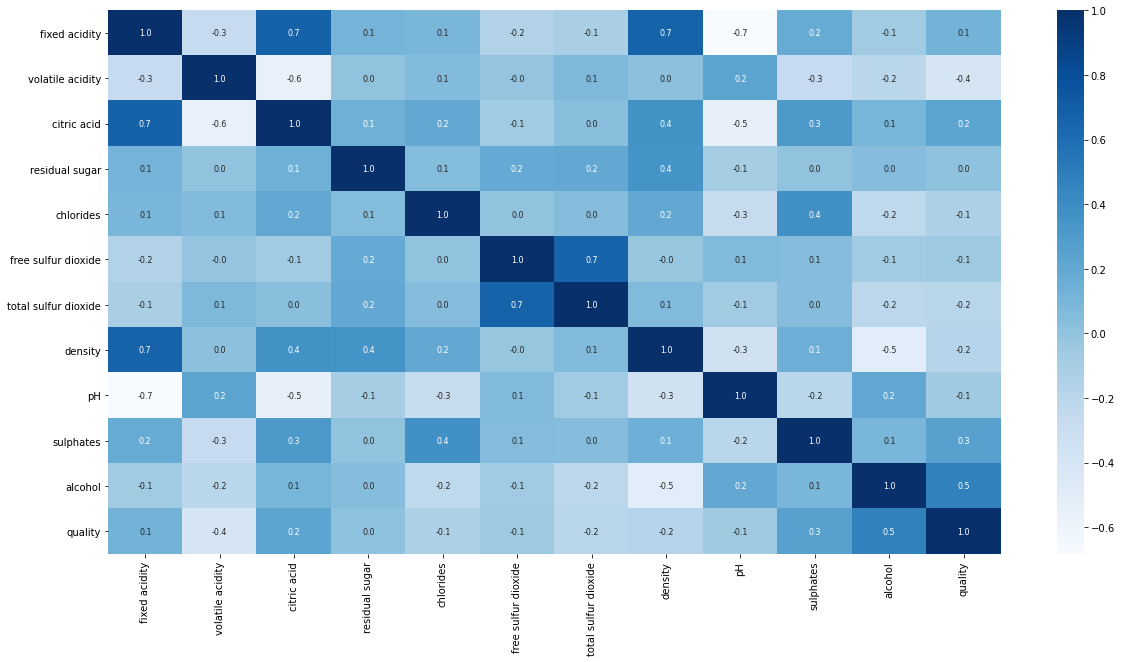

In [30]:
cor = df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(cor, cbar=True, fmt = '.1f', annot = True, annot_kws={'size':8}, cmap = 'Blues')

As we can see 'free sulphur dioxide' and 'total sulphur dioxide' are almost linearly dependent so we drop 'free sulphur dioxide' column

In [31]:
df = df.drop(columns=['free sulfur dioxide'])


In [32]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,34.0,0.9978,3.51,0.56,9.4,5


To make all features in same range we import StandardScalar of sklearn to do this.

In [33]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
X = std.fit_transform(df.loc[:,df.columns != 'quality'])


We make it results as if quality is greater than 6.5 it is considered as good(1) otherwise bad(0) 

In [34]:
def qualitycla(qua):
  if qua>6.5:
    qua=1
  else:
    qua = 0
  return qua

In [35]:
df['quality'] = df['quality'].apply(qualitycla)

In [37]:
y = df1['quality'].to_numpy()

In [38]:
y

array([0, 0, 0, ..., 0, 0, 0])

Importing SVM, Random forest, Logistic Regression, Decision Tree classifiers for model selection

In [39]:
import numpy as np
import cv2
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

Running Grid search for finding optimal model for prediction

In [40]:
grid = {
    'svm':{
        'model': svm.SVC(),
        'par':{
            'C':[0.1,1,5,10],
            'kernel':['rbf'],
            'gamma':[0.06,0.07,0.08,0.09,0.1]
        }
    },
    'RandomForest':{
        'model': RandomForestClassifier(),
        'par':{
            'n_estimators':[20,40,60,80]
        }
    },

    'Logistic':{
        'model': LogisticRegression(),
        'par':{
            'C':[0.1,0.5,1,2],
            'max_iter': [1000]
        }    
    },
    'Decision':{
        'model': DecisionTreeClassifier(),
        'par':{}
    }
}

In [41]:
scores = []
for model_name,mp in grid.items():
  model = GridSearchCV(mp['model'],mp['par'],cv= 10)
  model.fit(X,y)
  scores.append({
      'model':model_name,
      'best_score': model.best_score_,
      'best_param': model.best_params_,
  })

In [42]:
k = pd.DataFrame(scores,columns=['model','best_score','best_param'])
k

,model,best_score,best_param
0,svm,0.883683,"{'C': 1, 'gamma': 0.08, 'kernel': 'rbf'}"
1,RandomForest,0.877437,{'n_estimators': 20}
2,Logistic,0.874304,"{'C': 1, 'max_iter': 1000}"
3,Decision,0.824855,{}


As we can see we get highest accuracy when model is SVM with accuracy of 0.883683

In [24]:
model = svm.SVC(C=1,gamma=0.08,kernel='rbf')